# TIME = Runge-Kutta [Link](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Adaptive_Runge.E2.80.93Kutta_methods)
-----------------------------------

### Runge-Kutta 4th Methods

>$$ \dot{y}(t)  =   f(t,y(t))$$

>Recurrencia: $$y_{i+1} = y_i + \frac{1}{6}\delta t(k_1+2k_2+2k_3+k_4) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_1 \delta t) \\
  k_3 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_2 \delta t)\\
  k_4 = f(t_i+\delta t, y_i + k_3 \delta t)$$

**Hint:** The algoritmh is a chain but is optimal in memory because we need only 2 array to compute the next $k_i$ term and an extra array to store the new state

 ### Runge-Kutta-Fehlberg Method (RKF45)
 
 >$$ \dot{y}(t)  =   f(t,y(t))$$

>Recurrencia 4th Orden: $$y_{i+1} = y_i + \delta t(\frac{25}{216}k_1+\frac{1408}{2565}k_3+\frac{2197}{4101}k_4-\frac{1}{5}k_5) \\$$

>Recurrencia 5th Orden: $$z_{i+1} = y_i + \delta t(\frac{16}{135}k_1+\frac{6656}{12825}k_3+\frac{28561}{56430}k_4-\frac{9}{50}k_5+\frac{2}{55}k_6) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{4}\delta t, y_i+\frac{1}{4} k_1\delta t ) \\
  k_3 = f(t_i+\frac{3}{8}\delta t, y_i+\frac{3}{32} k_1\delta t + \frac{9}{32}k_2\delta t)\\
  k_4 = f(t_i+\frac{12}{13}\delta t, y_i + \frac{1932}{2197}k_1\delta t-\frac{7200}{2197}k_2\delta t+\frac{7296}{2197}k_3\delta t) \\
  k_5  = f(t_i+ \delta t, y_i+\frac{439}{216}k_1\delta t-8k_2\delta t+\frac{3680}{513}k_3\delta t-\frac{845}{4104}k_4\delta t)\\
  k_6  =  f(t_i+\frac{1}{2}\delta t, y_i-\frac{8}{27}k_1\delta t+2k_2\delta t-\frac{3544}{2565}k_3\delta t+\frac{1859}{4104}k_4\delta t-\frac{11}{40}k_5\delta t)$$
  

In principle it can be mesured the error in propagation in each time step $\delta t$ using the differeces $|z_{i+1}-y_{i+1}|<tol$, if is not passed by two approximations then the new time step is $\delta t/2$

# SPACE

## Finite Differences [ref2](http://www4.ncsu.edu/~cwsimmon/theory.html)
> **Central: 2nd Order Aprroximation** 
    >> $f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h}+\mathcal{O}(h^2)$
    
    >> $f''(x_i) = \frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2}+\mathcal{O}(h^2)$
    
> **Central: 4th Order Aprroximation**
    >> $f'(x_i) = \frac{-f(x_{i+2})+8f(x_{i+1})-8f(x_{i-1}+f(x_{i+2}))}{2h}+\mathcal{O}(h^4)$
    
    >> $f''(x_i) = \frac{-f(x_{i+2})+16f(x_{i+1})-30f(x_{i})+16f(x_{i-1})-f(x_{i-2})}{12h^2}+\mathcal{O}(h^4)$
    
## Spectral

> $ f'(x_i) \approx ifft( ik_x fft(f(x_i)) )$

> $ f''(x_i) \approx ifft( -k_x^2 fft(f(x_i)) )$

**let us test fallowing methods Rk4 + Spectral vs Rk4+FiniteDifferences vs Split+Spectral**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import all previous work structured in gpe2DRelax.py
from gpe2DRelax import * 

In [3]:
! ls

1stSesion_GPE2D.ipynb			    gpe2DRelax.pyc
2dRender.cu				    GPE Relax.ipynb
2ndSession_Animation.ipynb		    index.md
2ndSession_Dynamics.ipynb		    kernelImplicitFFT.cu
2ndSession_Dynamics_TexturesSurfaces.ipynb  kernelsDynamic.cu
_config.yml				    kernelsRelax.cu
glAnimation2D.py			    openGLExample.py
glAnimation2D.pyc			    README.md
gpe2DRelax.py				    Untitled.ipynb


[Scritp: gpe2DRelax.py](/edit/gpe2DRelax.py) | [Scritp: kernelsRelax.cu](/edit/kernelsRelax.cu)

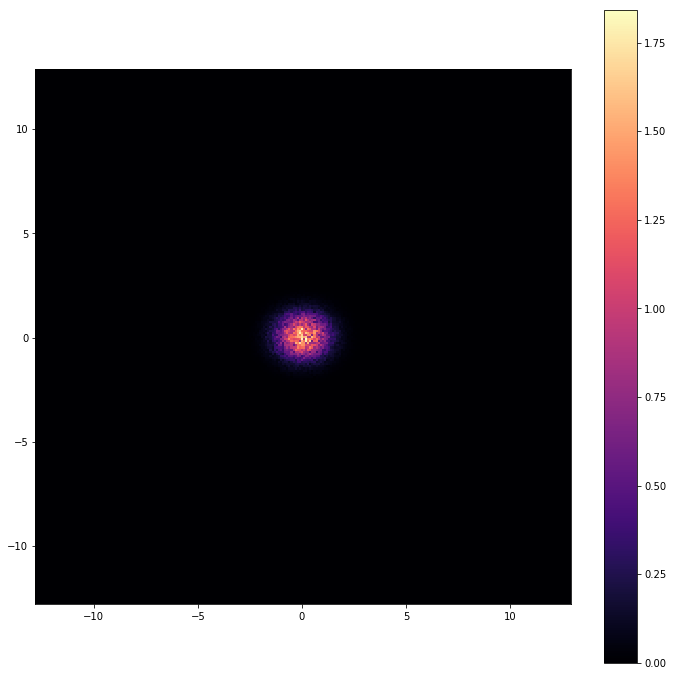

In [4]:
plotState(abs(Psi_gpu.get()))

whos

In [5]:
%whos GPUArray

Variable    Type        Data/Info
---------------------------------
Psi_gpu     GPUArray    [[ 0.+0.j  0.+0.j  0.+0.j<...> 0.+0.j  0.+0.j  0.+0.j]]
Psi_gpu_k   GPUArray    [[ 0.+0.j  0.+0.j  0.+0.j<...> 0.+0.j  0.+0.j  0.+0.j]]


%%time
for i in range(1000):
    implicitRelaxStep()
    

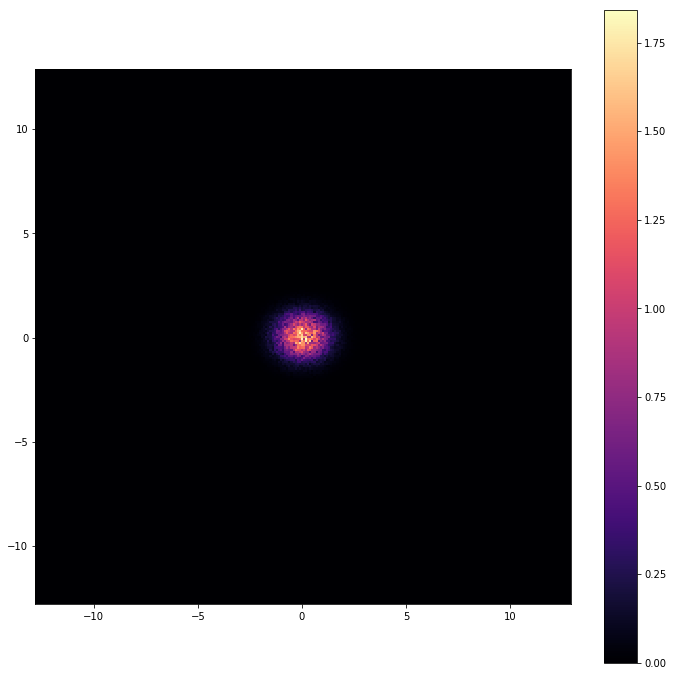

In [6]:
plotState(abs(Psi_gpu.get()))

In [45]:
%%time
for i in range(10000):
    splitStrangRelaxStep()

CPU times: user 7.03 s, sys: 3.82 s, total: 10.8 s
Wall time: 10.8 s


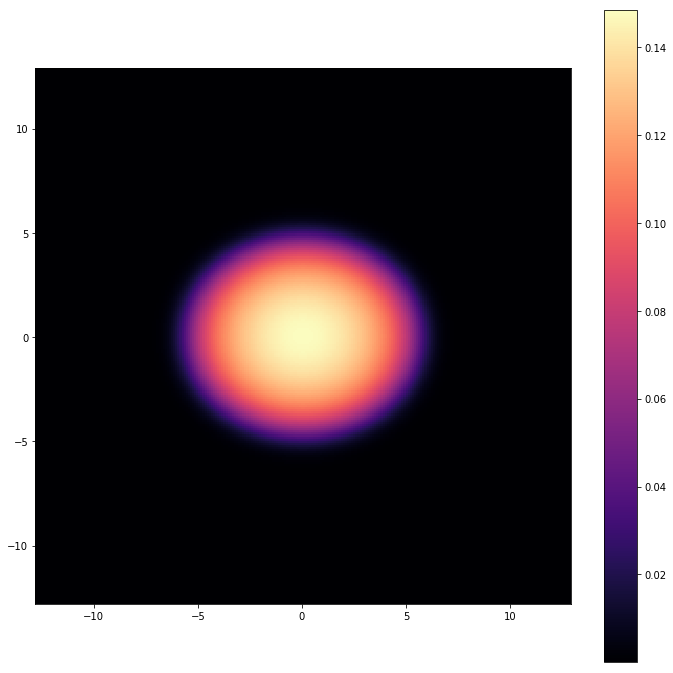

In [46]:
plotState(abs(Psi_gpu.get()))

In [78]:
%whos GPUArray

Variable      Type        Data/Info
-----------------------------------
Psi_gpu       GPUArray    [[ -3.20495559e-08 +7.557<...>02e-08 +1.23767492e-07j]]
Psi_gpu_k     GPUArray    [[  1.20348881e-12 +8.425<...>80e-12 -2.12528129e-13j]]
Psi_gpu_new   GPUArray    [[ -3.20495559e-08 +7.557<...>02e-08 +1.23767492e-07j]]


# Using Rk4+FInite Differences (Textures&Surfs)

$$f(x,y) =-i[ -\frac{1}{2}\nabla^2 \Psi (x,y,t)+\frac{1}{2}(\gamma_x^2 x^2+\gamma_y^2 y^2)\Psi(x,y,t)+ g_{2D}|\Psi(x,y,t)|^2\Psi(x,y,t)]$$
>Recurrence: $$y_{i+1} = y_i + \frac{1}{6}\delta t(k_1+2k_2+2k_3+k_4) \\$$
$$k_1 = f(t_i,y_i) \\
  k_2 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_1 \delta t) \\
  k_3 = f(t_i+\frac{1}{2}\delta t, y_i+\frac{1}{2} k_2 \delta t)\\
  k_4 = f(t_i+\delta t, y_i + k_3 \delta t)$$


In [48]:
from pycuda import driver as cuda

In [49]:
# Structured CUDA array
Psi_gpu_cudarray = cuda.gpuarray_to_array(Psi_gpu, order='C',allowSurfaceBind=True)
Psi_gpu_new = gpuarray.zeros([Nx,Ny], dtype=precComplex)

In [50]:
copy_C(Psi_gpu,Psi_gpu_new)

At beginning we should have 4 arrays $\psi_{aux}(surface)=\psi_{old}$ = $\psi_{new}$,$\psi_{aux2}$

 > 1) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$ (two ways: copy to cuda Arrays or Write it with Surfaces)
 
 > 2) Evaluate $f(t_i,\psi_{aux})$ to get $k_1$ -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_1$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_1\delta t$ for next laplacian evaluation
 
 > 3) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
 
 > 4) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_2$ an -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_2$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_2\delta t$ for next laplacian evaluation
 
 > 5) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
 
  > 6) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_3$  -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_3$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+k_3\delta t$ for next laplacian evaluation
  
  > 7) Calculate $\nabla_{i,j}^2\psi_{aux}$ and store in an auxiliar $\psi_{aux2}$
  
  > 8) Evaluate $f(t_i+\delta t,\psi_{aux})$  to get $k_4$  -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_4$ and overwrite $\psi_{old}=\psi_{new}$ and $\psi_{aux}=\psi_{new}$

Then interate from 1) -> 8): Because im  lazy we just use 1 kernels, a common  one $$f_{common}(\psi_{old},\psi_{new},k_i,\nabla_{i,j}^2(\psi_{old}+\alpha k_i))$$ 

Onces we undertand the flow of coding in PyCUDA, A good idea is keep distinct sources of the code in separate source files, python with python, cuda with cuda and so on ... developing in Jupyter has some advantages like this:
### [CUDA Kernels Dynamics](http://localhost:8888/edit/kernelsDynamic.cu)

In [51]:
myfile = open('kernelsDynamic.cu')
myKern = myfile.read()
myfile.close()

In [52]:
#print myKern

In [53]:
fftRK4K = compileGPU(myKern)

In [54]:
wpsi2Surf = fftRK4K.get_function('wpsi2Surf')
rpsi2Surf = fftRK4K.get_function('rpsi2Surf')
getNablaPSI = fftRK4K.get_function('applyNablaSurface')
stepRk4 = fftRK4K.get_function('rk4StepCommonSurface')
getEnergyGPU = fftRK4K.get_function('energy_kernelSurface')
surfaceRef = fftRK4K.get_surfref("surf_psi")
surfaceRef.set_array(Psi_gpu_cudarray)

In [55]:
wpsi2Surf.prepare('P') 
rpsi2Surf.prepare('P') 
#cudaPres dx, cudaPres dy, pycuda::complex<cudaPres> *kaux
getNablaPSI.prepare(2*cString+'P') 
#cudaPres at, cudaPres ak, cudaPres apsi, 
#cudaPres time, cudaPres dt,
#cudaPres xMin, cudaPres yMin, 
#cudaPres dx, cudaPres dy, 
#cudaPres gammaX, cudaPres gammaY,
#cudaPres constG, 
#pycuda::complex<cudaPres> *psi_old,
#pycuda::complex<cudaPres> *psi_new,
#pycuda::complex<cudaPres> *kaux, 
stepRk4.prepare(cString*12+'PPP')
#cudaPres xMin, cudaPres yMin, 
#cudaPres dx, cudaPres dy,
#cudaPres gammaX, cudaPres gammaY,
#cudaPres dt, cudaPres constG,
#pycuda::complex<cudaPres> *V2psi,
getEnergyGPU.prepare(cString*8+'P')

In [56]:
rpsi2Surf.prepared_call(gridDims, blockDims,
         Psi_gpu_k.gpudata)

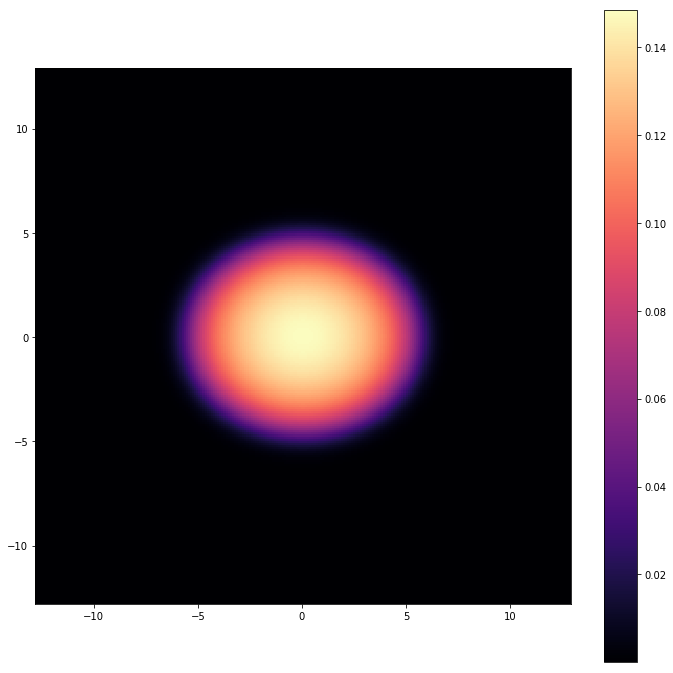

In [57]:
plotState(abs(Psi_gpu_k.get()))

1) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [58]:
getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)

2) Evaluate $f(t_i,\psi_{aux})$ to get $k_1$ -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_1$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_1\delta t$ for next laplacian evaluation

In [59]:
t=0
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0), prec(0.5), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)
                       

3) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [60]:
getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)

4) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_2$ an -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_2$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+\frac{1}{2}k_2\delta t$ for next laplacian evaluation
 

In [61]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(0.5), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)

5) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [62]:
getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)

6) Evaluate $f(t_i+\frac{1}{2}\delta t,\psi_{aux})$  to get $k_3$  -> sum contribution to $\psi_{new}+=\frac{2\delta t}{6}k_3$ and overwrite $\psi_{aux}$ $=$ $\psi_{old}+k_3\delta t$ for next laplacian evaluation

In [63]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(1), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)

7) Calculate $\nabla_{i,j}^2\psi_{aux}$ store in an auxiliar $\psi_{aux2}$

In [64]:
getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)

8) Evaluate $f(t_i+\delta t,\psi_{aux})$  to get $k_4$  -> sum contribution to $\psi_{new}+=\frac{\delta t}{6}k_4$ and overwrite $\psi_{old}=\psi_{new}$ and $\psi_{aux}=\psi_{new}$

In [65]:
stepRk4.prepared_call(gridDims, blockDims,
                      prec(1), prec(0), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)

In [66]:
copy_C(Psi_gpu_new,Psi_gpu)
#copy_C(Psi_gpu_new,Psi_gpu_k)
wpsi2Surf.prepared_call(gridDims, blockDims,
         Psi_gpu_new.gpudata)

In [67]:
t += dtau

In [68]:
def fftRk4Step():
    global t
    getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0), prec(0.5), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)
    
    getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(0.5), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)
    
    getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(0.5), prec(1), prec(2/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)
    
    getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)
    stepRk4.prepared_call(gridDims, blockDims,
                      prec(1), prec(0), prec(1/6.),prec(t),dtau,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY, g,
                       Psi_gpu.gpudata, Psi_gpu_new.gpudata,
                       Psi_gpu_k.gpudata)
    copy_C(Psi_gpu_new,Psi_gpu)
    wpsi2Surf.prepared_call(gridDims, blockDims,
         Psi_gpu_new.gpudata)
    t += dtau

In [69]:
def getEnergyState():
    getNablaPSI.prepared_call(gridDims, blockDims,
                         dx,dy,Psi_gpu_k.gpudata)
    getEnergyGPU.prepared_call(gridDims, blockDims,
                       x_min,y_min,
                       dx,dy, gammaX, gammaY,
                       dtau, g,
                       Psi_gpu_k.gpudata)
    energy = get_integral_C(dx,dy,Psi_gpu_k).get()
    return energy

In [70]:
getEnergyState()

array((8.245854377746582-2.4374458007514477e-10j), dtype=complex64)

In [71]:
get_Norm_C(dx,dy,Psi_gpu).get()

array(0.9999998807907104, dtype=float32)

In [72]:
%%time
e = []
norma = []
time = []
for i in range(100):
    for j in range(100): fftRk4Step()
    e.append(getEnergyState())
    time.append(dtau*100*(i+1))
    norma.append(get_Norm_C(dx,dy,Psi_gpu).get())

CPU times: user 7.98 s, sys: 1.68 s, total: 9.66 s
Wall time: 9.65 s


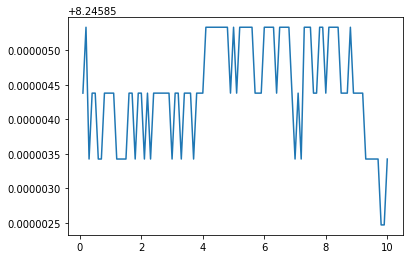

In [73]:
plot(time,array(e).real)
#plot(time,array(e).imag)

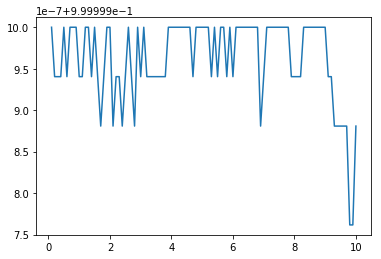

In [74]:
plot(time,array(norma).real)
#plot(time,array(norma).imag)
#ylim(0.999999,1.000001)

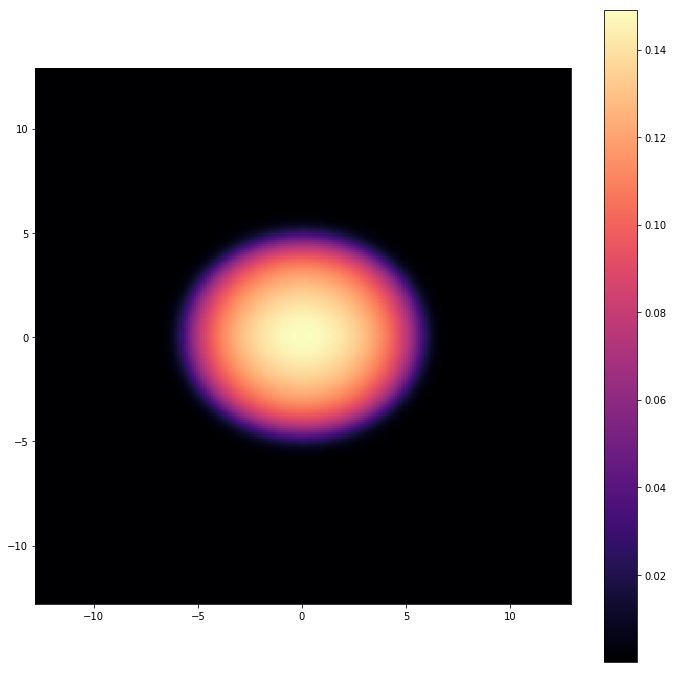

In [75]:
plotState(abs(Psi_gpu.get()))

In [76]:
t

10.001000475022011

In [39]:
getEnergyState()

array((8.251016616821289-9.19681042432785e-09j), dtype=complex64)

In [40]:
DeltaE = max(array(e).real)     - min(array(e).real)
DeltaN = max(array(norma).real) - min(array(norma).real)

In [77]:
DeltaE, DeltaN

(3.8146973e-06, 3.5762787e-07)

## QUIZ: Perform a cleaner script from all methods described. Structure the code in functions are more suitable to perform tests, benchmarks, new methods, ...
